In [104]:
# Colab 폴더로 경로 이동
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning

/content/drive/MyDrive/Colab Notebooks/DeepLearning


# MNIST + PCA
---
- Feature 784개 ===> 주요 Feature로 압축


In [105]:
from sklearn.decomposition import PCA
from tensorflow.keras.datasets.mnist import load_data
import numpy as np
import matplotlib.pyplot as plt

# [1] 데이터 로딩

In [106]:
(x_train, y_train),(x_test,y_test) = load_data()

In [107]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

# MNIST의 PC(주성분 요소) 수 찾기
---
# [2] 데이터 전처리

In [108]:
# 0~1 사이 범위값으로 Feature 정규화
x_train = x_train/255.0
x_test = x_test/255.0

In [109]:
# PCA 하기 위해 2차원으로 reshape
x_train = x_train.reshape(-1,28*28)
x_test= x_test.reshape(-1,28*28)

In [115]:
# 98% 비율로 PCA
pca_98 = PCA(n_components= 98)
pca_98.fit(x_train)
mnist_98 = pca_98.transform(x_train)

In [116]:
# 70% 비율로 PC 확인
pca_70 = PCA(n_components= 70)
pca_70.fit(x_train)
mnist_70 = pca_70.transform(x_train)

In [117]:
# PCA 데이터 확인
print(pca_98.singular_values_[:5])
print(pca_98.explained_variance_[:5])
print(pca_98.explained_variance_ratio_[:5])

[554.08236184 473.79289646 441.76832659 412.90967564 392.45954891]
[5.11687301 3.74139084 3.25270845 2.8416207  2.56711774]
[0.09704664 0.07095924 0.06169089 0.05389419 0.04868797]


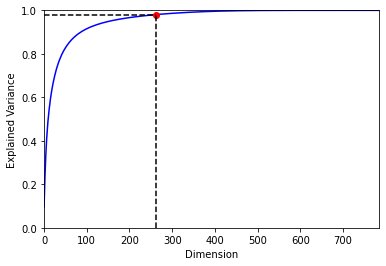

In [113]:
# 주성분과 데이터 투영 분산 저정도 시각화
pca_temp = PCA()
pca_temp.fit(x_train)
cumsum = np.cumsum(pca_temp.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.98) + 1

plt.plot(cumsum, 'b-')
plt.plot(dim, 0.98, 'ro')
plt.plot([261.0, 261.0], [0, 0.98], 'k--')
plt.plot([0, 261.0], [0.98, 0.98], 'k--')
plt.axis([0, 784, 0, 1])
plt.xlabel('Dimension')
plt.ylabel('Explained Variance')
plt.show()

In [118]:
# PCA 복원
re_98 = pca_98.inverse_transform(mnist_98)
re_70 = pca_70.inverse_transform(mnist_70)
re_98.shape,re_70.shape

((60000, 784), (60000, 784))

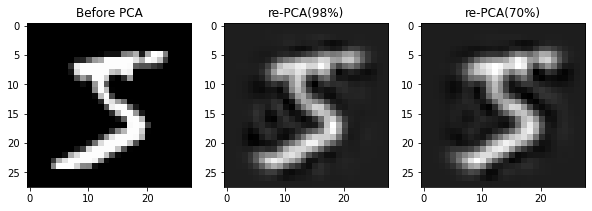

In [121]:
# imshow로 시각화
plt.figure(figsize=(10, 10))
plt.subplot(1,3,1)
plt.title('Before PCA')
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')

plt.subplot(1,3,2)
plt.title('re-PCA(98%)')
plt.imshow(re_98[0].reshape(28, 28), cmap='gray')

plt.subplot(1,3,3)
plt.title('re-PCA(70%)')
plt.imshow(re_70[0].reshape(28, 28), cmap='gray')
plt.show()

In [131]:
# PCA 전후 이미지 비교
def drawImage(selectimg,title):
  plt.imshow(selectimg.reshape(28,28),cmap='gray')
  plt.title(f'[{title}]')
  plt.show()

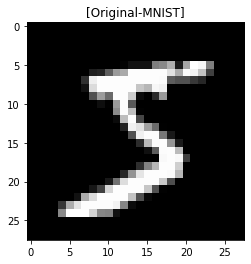

In [132]:
drawImage(x_train[0],'Original-MNIST')